<a href="https://colab.research.google.com/github/delemarchand2020/MiscellaneousColab/blob/main/AnalyseSondageDevops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation du rapport

In [1]:
#@title Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#@title Lecture du fichier de données du sondage
file_name = "https://github.com/delemarchand2020/MiscellaneousColab/raw/main/sondage_devops.xlsx"
df = pd.read_excel(file_name, sheet_name='data')
nb_repondant = df.shape[0]

# Analyse générale

Envoi du sondage via les personnes suivantes début juin 2021 :
* Dev : tous les RG du DEV
* Projet : les 3 RG du secteur Europe + la ScrumMasteure SNCF

129 personnes ont répondu.

*On notera que le taux de participation semble très correct pour un sondage non officiel (soumis par l'entremise des RG).*

Mon secteur/groupe
DEV - Algo                    18
DEV - Applicatif              79
DEV - Plateforme et outils    14
Gestion (direction)            2
Projets                       16
Name: Mon secteur/groupe, dtype: int64

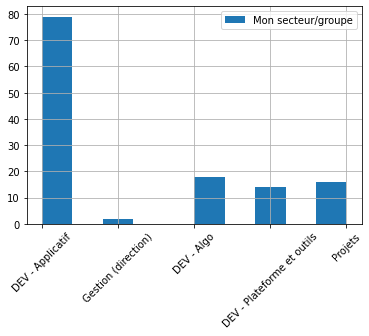

In [3]:
#@title Répartition des répondants par secteur
dummy = df['Mon secteur/groupe'].hist(legend=True, xrot=45)
df.groupby('Mon secteur/groupe')['Mon secteur/groupe'].count()

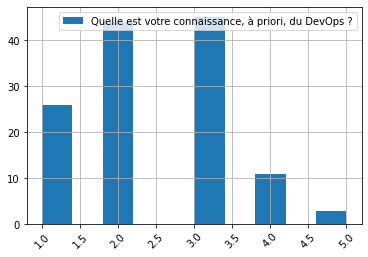

In [4]:
#@title Connaissance à priori du Devops - distribution des notes (1 à 5)
dummy = df['Quelle est votre connaissance, à priori, du DevOps ?'].hist(legend=True, xrot=45)

Sur l'ensemble des répondants, la connaissance à priori du Devops est timidement moyenne. 

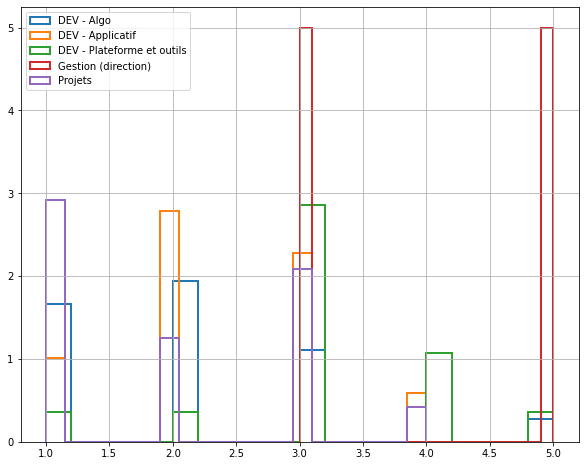

In [5]:
#@title Connaissance à priori du Devops par secteur - distribution des notes (1 à 5)
plt.figure(figsize=[10,8])
dummy = df.groupby('Mon secteur/groupe')['Quelle est votre connaissance, à priori, du DevOps ?'].hist(legend=True, density=True, bins=20,alpha=2, histtype='step', linewidth=2)

La connaissance à priori du Devops est plus élevée pour le secteur plateforme/outils et est significativement plus faible dans les secteurs applicatif, projets et algo. 

*Ce n'est guère surprenant quand on pense que le Devops se rapporte souvent aux outils et mécanismes de "build".*

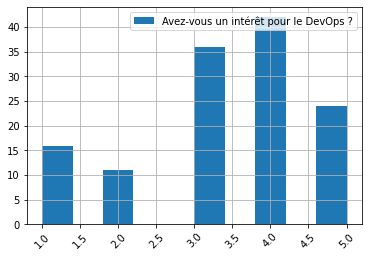

In [6]:
#@title Intérêt pour le Devops - distribution des notes (1 à 5)
dummy = df['Avez-vous un intérêt pour le DevOps ?'].hist(legend=True, xrot=45)

Sur l'ensemble des répondants, l'intérêt pour le Devops est relativement élevé.

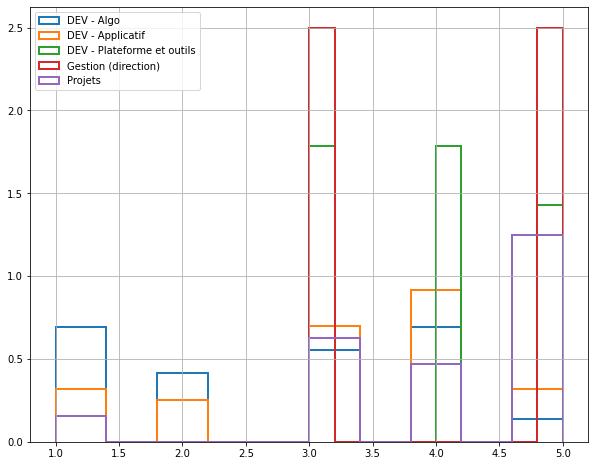

In [7]:
#@title Intérêt pour le Devops par secteur - distribution des notes (1 à 5)
plt.figure(figsize=[10,8])
dummy = df.groupby('Mon secteur/groupe')['Avez-vous un intérêt pour le DevOps ?'].hist(legend=True, density=True, bins=10, alpha=2, histtype='step', linewidth=2)

L'intérêt pour le Devops est plus élevé pour les secteurs plateforme/outils ainsi que les projets. Les secteurs algo, et dans une moindre mesure, applicatif sont plus dispersés face à l'intérêt pour ce sujet.

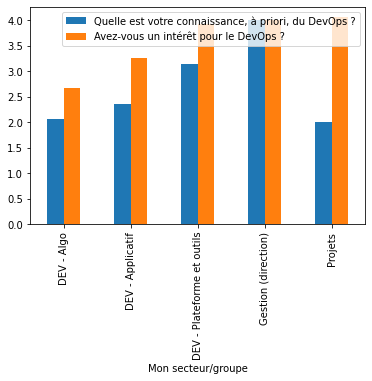

In [8]:
#@title Comparaison de la note moyenne par secteur connaissance versus intérêt
dummy = df.groupby('Mon secteur/groupe')['Quelle est votre connaissance, à priori, du DevOps ?',
                                         'Avez-vous un intérêt pour le DevOps ?'].mean().plot(kind = 'bar')

On retrouve la synthèse entre connaissance et intérêt pour les différents secteurs. On note toutefois que les répondants de tous les secteurs veulent augmenter leurs connaissances (intérêt plus fort que la connaissance à priori) et ceci est particulièrement vrai pour le secteur projets.

# Analyse des thèmes et sujets

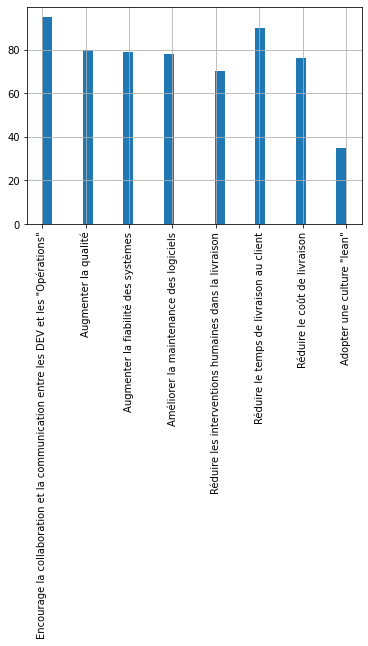

In [9]:
#@title Répartition de ce que permet le Devops selon l'ensemble des répondants
new_df = df['Selon vous, que permet le DevOps ?'].str.split(';', expand=True)
new_df = new_df.stack().reset_index()
new_df = new_df[new_df != '']
dummy = new_df[0].hist(xrot=90, density=False, bins=30)

Sur l'ensemble des répondants, 2 thèmes ressortent légèrement quant à ce que permet le Devops :
* Encourage la collaboration et la communication entre DEV et "opérations".
* Réduire le temps de livraison au client.

Tandis qu'adopter la culture "lean" et réduire les interventions humaines dans la livraison récoltent le moins de suffrage.

*On notera que la "bonne" réponse correspond à tous les choix de thèmes.*

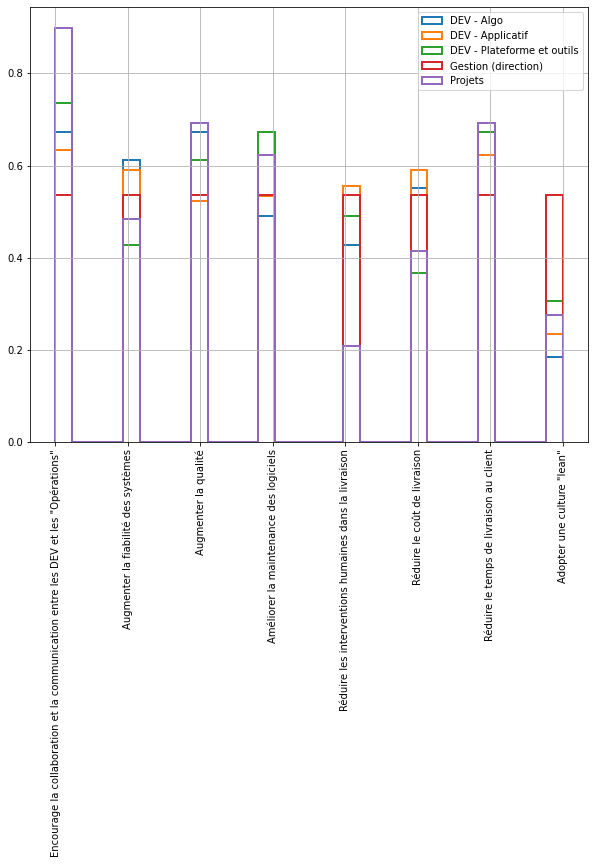

In [10]:
#@title Répartition de ce que permet le Devops selon les secteurs
new_df = df.loc[:,['Mon secteur/groupe','Selon vous, que permet le DevOps ?']]
new_cols = new_df['Selon vous, que permet le DevOps ?'].str.split(';', expand=True)
new_df = pd.concat([new_df, new_cols], axis=1)
new_df = new_df.drop(columns=['Selon vous, que permet le DevOps ?'])
new_df = new_df.stack().reset_index() 
new_data = []
secteur_name = ''
for x in new_df.values:
  if x[1] == 'Mon secteur/groupe':
    secteur_name = x[2]
    continue
  if x[2] != '':
    new_data.append([secteur_name, x[2]])

new_df_2 = pd.DataFrame(new_data,columns=['secteur', 'item_permet_devops'])
new_df_2

plt.figure(figsize=[10,8])
dummy = new_df_2.groupby('secteur')['item_permet_devops'].hist(legend=True, density=True, bins=30, xrot=90, alpha=2, histtype='step', linewidth=2)

Ce graphique permet de creuser les interprétations de ce que le Devops permet par secteur. 

*Ainsi on notera que la réduction des interventions humaines semble plus "utopique" pour les projets.*

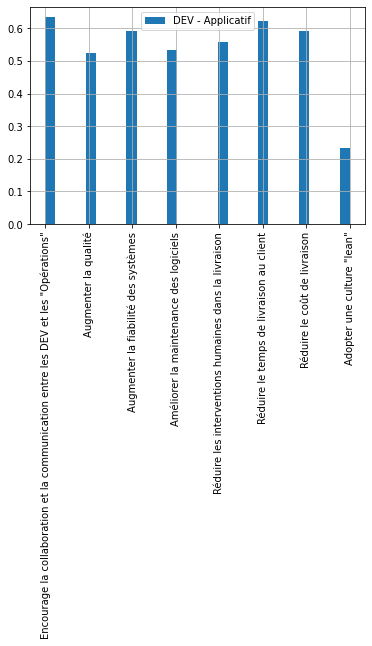

In [11]:
#@title Zoom sur le secteur applicatif
dummy = new_df_2[new_df_2['secteur'] == 'DEV - Applicatif']
dummy = dummy.groupby('secteur')['item_permet_devops'].hist(legend=True, density=True, bins=30, xrot=90)

Les thèmes sont bien équilibrés, il subsiste une mauvaise interprétation face à la culture "lean" du Devops.

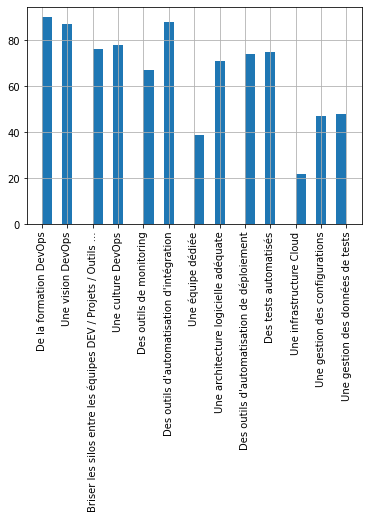

In [12]:
#@title Répartition des requis pour faire du Devops selon l'ensemble des répondants
new_df = df['Selon vous, pour faire du DevOps, il faut quoi ?'] .str.split(';', expand=True)
new_df = new_df.stack().reset_index()
new_df = new_df[new_df != '']
dummy = new_df[0].hist(xrot=90, density=False, bins=30)

Sur l'ensemble des répondants, l'infrastructure cloud n'est pas un requis pour faire du Devops.

Les 3 thèmes suivants sont également très faibles en termes de votes:
* Une équipe dédiée (c'était le seul piège de la question).
* Gestion des configuations.
* Gestion des données de tests.

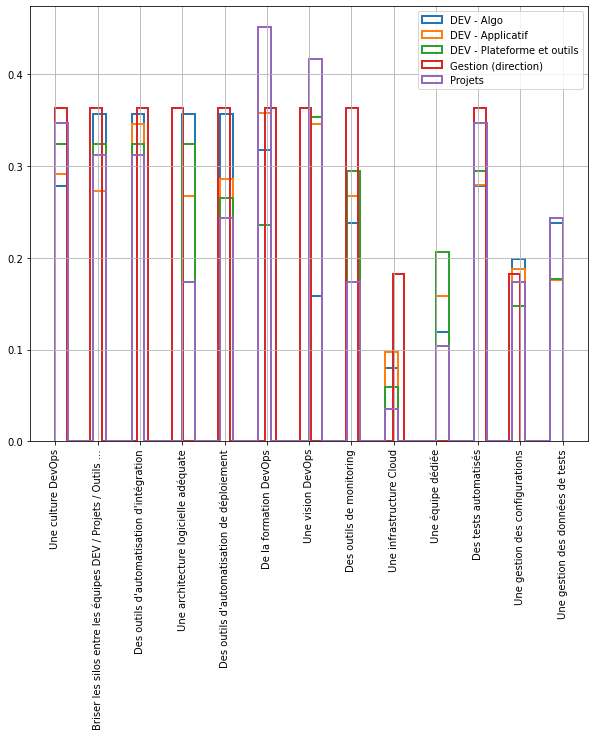

In [13]:
#@title Répartition des requis pour faire du Devops selon les secteurs
new_df = df.loc[:,['Mon secteur/groupe','Selon vous, pour faire du DevOps, il faut quoi ?']]
new_cols = new_df['Selon vous, pour faire du DevOps, il faut quoi ?'].str.split(';', expand=True)
new_df = pd.concat([new_df, new_cols], axis=1)
new_df = new_df.drop(columns=['Selon vous, pour faire du DevOps, il faut quoi ?'])
new_df = new_df.stack().reset_index() 
new_data = []
secteur_name = ''
for x in new_df.values:
  if x[1] == 'Mon secteur/groupe':
    secteur_name = x[2]
    continue
  if x[2] != '':
    new_data.append([secteur_name, x[2]])

new_df_2 = pd.DataFrame(new_data,columns=['secteur', 'item_pour_faire_devops'])
new_df_2

plt.figure(figsize=[10,8])
dummy = new_df_2.groupby('secteur')['item_pour_faire_devops'].hist(legend=True, density=True, bins=40, xrot=90, alpha=2, histtype='step', linewidth=2)

Ce graphique permet de creuser les attentes des secteurs face à la mise en place du Devops. 

*Fait intéressant : on notera que la gestion des données de tests sont plus une préoccupation pour les secteurs algo et projets.*

# Conclusion

Ce sondage permet de constater un certain intérêt pour le Devops de la part de tous et une bonne compréhension générale de ce qu'est le Devops. Il va permettre de guider les premières étapes de communication autour de ce sujet (on sait sur quels points accentuer le discours) et sur quels secteurs renforcer les différents aspects du Devops. 

Certainement qu'il faudra pondérer les messages en fonction du public cible, par exemple pour contrer le mythe de l'équipe Devops dédiée dans le secteur plateforme/outils ou pour expliquer la nécessité des outils de monitoring dans les secteurs projets.